# Getting Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('DS_airline_delay_causes.csv')

In [3]:
df.shape

(73282, 22)

In [4]:
df.columns

Index(['year', ' month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', ' weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       ' arr_delay', ' carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'Unnamed: 21'],
      dtype='object')

In [5]:
df.rename(columns={' month':'month',' weather_ct':'weather_ct',' arr_delay':'arr_delay',' carrier_delay':'carrier_delay'},inplace=True)


# Features Descriptions

* year : Year
* month : Month
* carrier : The airline's code
* carrier_name : The airline's full name
* airport : The airport's code
* airport_name: The airport's full name, including "city:the name of airport"
* arr_flights : Number of flights arriving at airport
* arr_del15 : Number of flights more than 15 minutes late
    * carrier_ct : Number of flights delayed due to air carrier. (e.g. no crew)
    * weather_ct : Number of flights delayed due to weather
    * nas_ct: Number of flights delayed due to National Aviation System (e.g. heavy air traffic)
    * security_ct : Number of flights delayed due to a security breach
    * late_aircraft_ct : Number of flights delayed as a result of another flight on the same aircraft delayed
* arr_cancelled : Number of cancelled flights
* arr_diverted : Number of flights that were diverted
* arr_delay : Total time (minutes) of delayed flight
    * carrier_delay : Total time (minutes) of delay due to air carrier
    * weather_delay : Total time (minutes) of delay due to inclement weather
    * nas_delay : Total time (minutes) of delay due to National Aviation System
    * security_delay : Total time (minutes) of delay as a result of a security issue
    * late_aircraft_delay : Total time (minutes) of delay flights as a result of a previous flight on the same airplane being late

In [6]:
df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
count,73282.000000,73282.000000,73240.000000,73211.000000,73240.000000,73240.000000,73240.000000,73240.000000,73240.000000,73240.000000,73240.000000,73240.000000,73240.000000,73240.000000,73240.000000,73240.000000,73240.000000,0.0
mean,2011.191684,6.576499,993.874235,191.557594,46.916813,6.167805,74.535534,0.430516,63.431131,18.667955,2.305380,11335.262807,3059.317873,527.980093,3592.494866,17.295330,4138.167695,NaN
std,5.083600,3.446558,1854.978795,362.768908,80.788101,16.563787,162.961171,1.406218,135.432397,69.355569,7.276267,23121.325039,6159.240736,1505.558172,9061.308550,63.384061,8986.566307,NaN
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.000000,0.000000,0.000000,NaN
25%,2007.000000,4.000000,124.000000,24.000000,7.510000,0.000000,7.737500,0.000000,4.350000,0.000000,0.000000,1216.000000,374.000000,0.000000,288.000000,0.000000,246.000000,NaN
50%,2011.000000,7.000000,331.000000,68.000000,19.920000,1.400000,23.880000,0.000000,15.750000,3.000000,0.000000,3580.000000,1079.000000,91.000000,952.000000,0.000000,996.000000,NaN
75%,2016.000000,10.000000,866.000000,175.000000,48.400000,5.400000,66.050000,0.090000,51.310000,12.000000,2.000000,9927.000000,2836.000000,425.000000,2878.250000,4.000000,3429.000000,NaN
max,2020.000000,12.000000,21977.000000,6377.000000,1792.070000,641.540000,4091.270000,80.560000,1885.470000,4951.000000,256.000000,433687.000000,196944.000000,57707.000000,238440.000000,3194.000000,148181.000000,NaN


In [7]:
df=df.drop('Unnamed: 21',axis=1)

In [8]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2009,11,AS,Alaska Airlines Inc.,DCA,"Washington, DC: Ronald Reagan Washington National",88.0,11.0,1.99,0.00,...,0.0,0.00,0.0,0.0,266.0,65.0,0.0,201.0,0.0,0.0
1,2009,11,AS,Alaska Airlines Inc.,DEN,"Denver, CO: Denver International",123.0,5.0,3.47,0.00,...,0.0,0.00,0.0,0.0,81.0,57.0,0.0,24.0,0.0,0.0
2,2009,11,AS,Alaska Airlines Inc.,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",66.0,6.0,1.28,0.69,...,0.0,0.00,0.0,0.0,176.0,64.0,11.0,101.0,0.0,0.0
3,2009,11,AS,Alaska Airlines Inc.,EWR,"Newark, NJ: Newark Liberty International",59.0,10.0,0.24,0.00,...,0.0,0.56,0.0,0.0,553.0,8.0,0.0,526.0,0.0,19.0
4,2009,11,AS,Alaska Airlines Inc.,HNL,"Honolulu, HI: Daniel K Inouye International",85.0,18.0,1.34,1.46,...,0.0,0.00,0.0,0.0,547.0,85.0,89.0,373.0,0.0,0.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73282 entries, 0 to 73281
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 73282 non-null  int64  
 1   month                73282 non-null  int64  
 2   carrier              73282 non-null  object 
 3   carrier_name         73282 non-null  object 
 4   airport              73282 non-null  object 
 5   airport_name         73282 non-null  object 
 6   arr_flights          73240 non-null  float64
 7   arr_del15            73211 non-null  float64
 8   carrier_ct           73240 non-null  float64
 9   weather_ct           73240 non-null  float64
 10  nas_ct               73240 non-null  float64
 11  security_ct          73240 non-null  float64
 12  late_aircraft_ct     73240 non-null  float64
 13  arr_cancelled        73240 non-null  float64
 14  arr_diverted         73240 non-null  float64
 15  arr_delay            73240 non-null 

In [10]:
np.sum(df.isna())

year                    0
month                   0
carrier                 0
carrier_name            0
airport                 0
airport_name            0
arr_flights            42
arr_del15              71
carrier_ct             42
weather_ct             42
nas_ct                 42
security_ct            42
late_aircraft_ct       42
arr_cancelled          42
arr_diverted           42
arr_delay              42
carrier_delay          42
weather_delay          42
nas_delay              42
security_delay         42
late_aircraft_delay    42
dtype: int64

In [11]:
df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [12]:
df[df.isna().any(axis=1)]

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
981,2010,1,OO,SkyWest Airlines Inc.,CLT,"Charlotte, NC: Charlotte Douglas International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2884,2019,3,EV,ExpressJet Airlines Inc.,PHL,"Philadelphia, PA: Philadelphia International",1.0,NaN,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6915,2012,9,F9,Frontier Airlines Inc.,ORD,"Chicago, IL: Chicago O'Hare International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7214,2012,10,F9,Frontier Airlines Inc.,ORD,"Chicago, IL: Chicago O'Hare International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12623,2003,9,RU,ExpressJet Airlines Inc.,TPA,"Tampa, FL: Tampa International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69589,2007,11,EV,Atlantic Southeast Airlines,MDW,"Chicago, IL: Chicago Midway International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70004,2007,12,EV,Atlantic Southeast Airlines,JFK,"New York, NY: John F. Kennedy International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70998,2009,7,UA,United Air Lines Inc.,MIA,"Miami, FL: Miami International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71686,2016,9,EV,ExpressJet Airlines Inc.,FLL,"Fort Lauderdale, FL: Fort Lauderdale-Hollywood...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.dropna(inplace=True,axis=0)

In [14]:
np.sum(df.isna())

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

In [15]:
df['city-state']=df['airport_name'].agg(lambda x:x.split(':')[0])
df['city']=df['city-state'].agg(lambda x:x.split(',')[0])
df['state']=df['city-state'].agg(lambda x:x.split(',')[1])
df=df.drop('city-state',axis=1)

In [16]:
df['year_month']=df['year'].astype(str)+'-'+df['month'].astype(str)
df['year_month']=pd.to_datetime(df['year_month']).dt.strftime('%Y-%m')

In [17]:
df=df.iloc[:,[0,1,23,2,3,4,5,22,21,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]]

In [18]:
df['del_arr_ratio']=df['arr_del15']/df['arr_flights']
df['cancelled_arr_ratio']=df['arr_cancelled']/df['arr_flights']
df['diverted_arr_ratio']=df['arr_diverted']/df['arr_flights']

In [19]:
df.to_csv('df_clean_zerog.csv')

In [20]:
df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,del_arr_ratio,cancelled_arr_ratio,diverted_arr_ratio
count,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000
mean,2011.188483,6.576894,994.259606,191.557594,46.935397,6.170249,74.565059,0.430687,63.456257,18.667072,2.306252,11339.752879,3060.529715,528.189234,3593.917909,17.302181,4139.806887,0.213571,0.018265,0.002593
std,5.081828,3.446720,1855.244965,362.768908,80.798703,16.566612,162.986690,1.406470,135.453333,69.366322,7.277573,23124.803113,6160.159482,1505.819654,9062.820901,63.395679,8987.968516,0.106593,0.039967,0.014606
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.000000,4.000000,124.000000,24.000000,7.520000,0.000000,7.750000,0.000000,4.360000,0.000000,0.000000,1218.000000,375.000000,0.000000,289.000000,0.000000,247.000000,0.140893,0.000000,0.000000
50%,2011.000000,7.000000,331.000000,68.000000,19.930000,1.400000,23.900000,0.000000,15.760000,3.000000,0.000000,3582.000000,1080.000000,91.000000,952.000000,0.000000,997.000000,0.201307,0.006667,0.000000
75%,2016.000000,10.000000,867.000000,175.000000,48.420000,5.400000,66.060000,0.090000,51.335000,12.000000,2.000000,9932.000000,2837.000000,425.000000,2880.000000,4.000000,3431.000000,0.272727,0.020490,0.002842
max,2020.000000,12.000000,21977.000000,6377.000000,1792.070000,641.540000,4091.270000,80.560000,1885.470000,4951.000000,256.000000,433687.000000,196944.000000,57707.000000,238440.000000,3194.000000,148181.000000,1.000000,0.988095,1.000000


In [21]:
df.state.unique()

array([' DC', ' CO', ' TX', ' NJ', ' HI', ' NV', ' CA', ' FL', ' MN',
       ' IL', ' OR', ' AZ', ' WA', ' MA', ' MD', ' NC', ' NY', ' UT',
       ' GA', ' MI', ' PA'], dtype=object)

In [22]:
df.city.unique()

array(['Washington', 'Denver', 'Dallas/Fort Worth', 'Newark', 'Honolulu',
       'Houston', 'Las Vegas', 'Los Angeles', 'Orlando', 'Miami',
       'Minneapolis', 'Chicago', 'Portland', 'Phoenix', 'San Diego',
       'Seattle', 'San Francisco', 'Boston', 'Baltimore', 'Charlotte',
       'Fort Lauderdale', 'New York', 'Salt Lake City', 'Tampa',
       'Atlanta', 'Detroit', 'Philadelphia'], dtype=object)

In [23]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

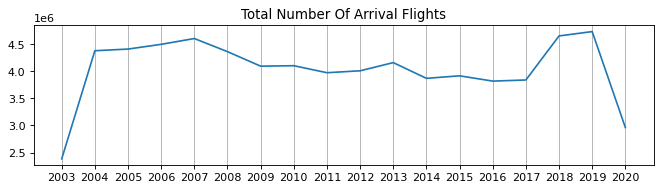

<Figure size 800x400 with 0 Axes>

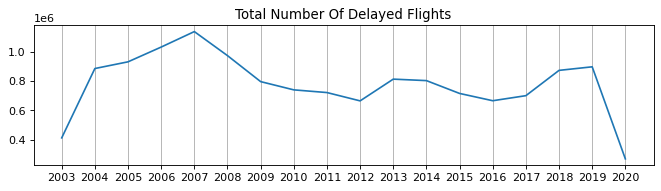

In [24]:
plt.figure(1,figsize=(10, 5), dpi=80)
plt.subplot(2,1,1)
plt.plot(df.groupby('year').arr_flights.agg(sum))
plt.title("Total Number Of Arrival Flights")
plt.xticks(df.groupby('year').arr_flights.agg(sum).index)
plt.grid(axis='x')
plt.figure(2,figsize=(10, 5), dpi=80)
figure(figsize=(10, 5), dpi=80)
plt.subplot(2,1,2)
plt.plot(df.groupby('year').arr_del15.agg(sum))
plt.title("Total Number Of Delayed Flights")
plt.xticks(df.groupby('year').arr_del15.agg(sum).index)
plt.grid(axis='x')
plt.show();

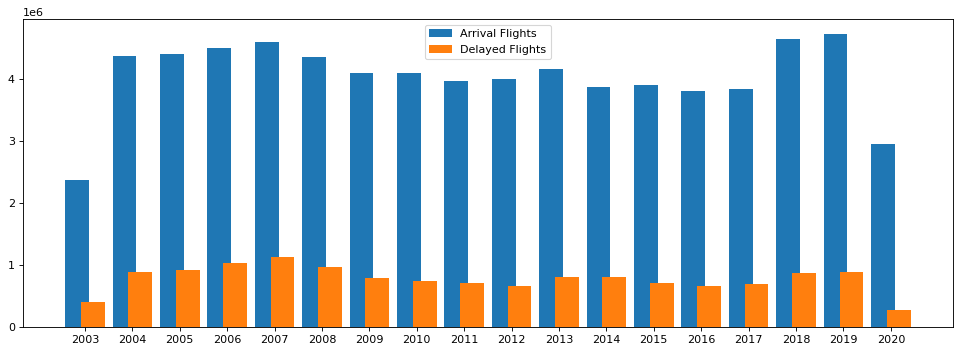

In [25]:
plt.figure(figsize=(15, 5), dpi=80)
years=np.sort(df.year.unique())
width=0.5
df_arr=df.groupby('year').arr_flights.agg(sum)
df_del=df.groupby('year').arr_del15.agg(sum)
plt.bar(years-width/3,df_arr,width=width,label='Arrival Flights')
plt.bar(years+width/3,df_del,width=width,label='Delayed Flights')
plt.xticks(years)
plt.legend()
plt.show();

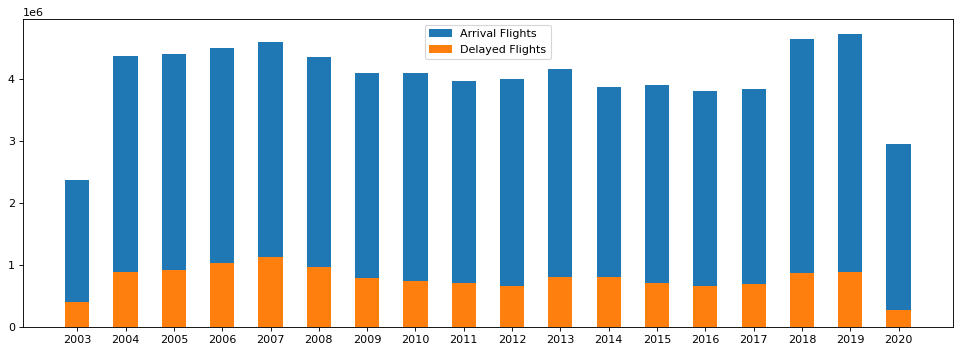

In [26]:
plt.figure(figsize=(15, 5), dpi=80)
years=np.sort(df.year.unique())
width=0.5
df_arr=df.groupby('year').arr_flights.agg(sum)
df_del=df.groupby('year').arr_del15.agg(sum)
plt.bar(years,df_arr,width=width,label='Arrival Flights')
plt.bar(years,df_del,width=width,label='Delayed Flights')
plt.xticks(years)
plt.legend()
plt.show();

In [27]:
df_del_arr=df.groupby('year').agg(sum).loc[:,['arr_flights','arr_del15']]
df_del_arr['del_arr_ratio']=df_del_arr['arr_del15']/df_del_arr['arr_flights']
df_del_arr

,arr_flights,arr_del15,del_arr_ratio
year,,,
2003,2383871.0,413100.0,0.173290
2004,4380629.0,884743.0,0.201967
2005,4411433.0,930310.0,0.210886
2006,4499064.0,1030685.0,0.229089
2007,4606106.0,1135966.0,0.246622
2008,4363926.0,972490.0,0.222848
2009,4095601.0,795729.0,0.194289
2010,4104191.0,739618.0,0.180210
2011,3974825.0,721328.0,0.181474


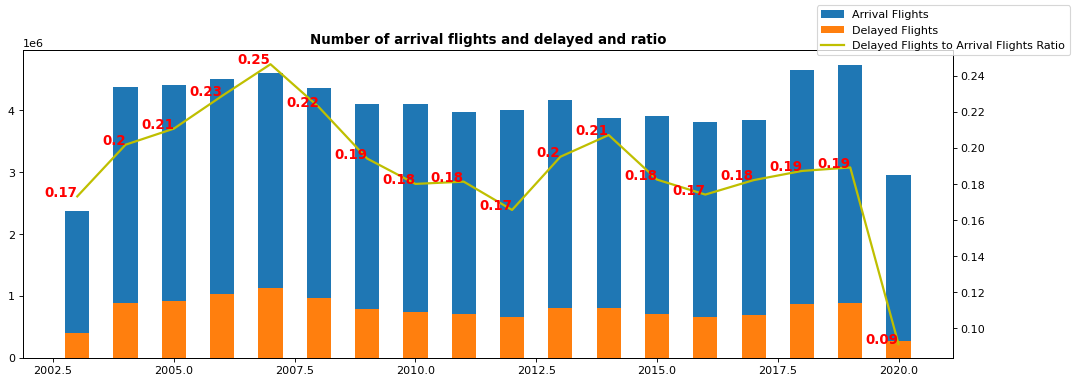

In [28]:
years=np.sort(df.year.unique())
width=0.5



fig,ax1=plt.subplots(figsize=(15, 5), dpi=80)


ax1.bar(years,df_del_arr.arr_flights,width=width,label='Arrival Flights')
ax1.bar(years,df_del_arr.arr_del15,width=width,label='Delayed Flights')


ax2=ax1.twinx()

ax2.plot(df_del_arr.del_arr_ratio, c='y', label="Delayed Flights to Arrival Flights Ratio",linewidth=2)

for i in range(len(years)):
    ax2.text(years[i],df_del_arr.del_arr_ratio.iloc[i],round(df_del_arr.del_arr_ratio.iloc[i],2),ha='right',c='r',size='large',weight='bold')
    
fig.legend()
plt.title('Number of arrival flights and delayed and ratio',weight='bold')
plt.show();

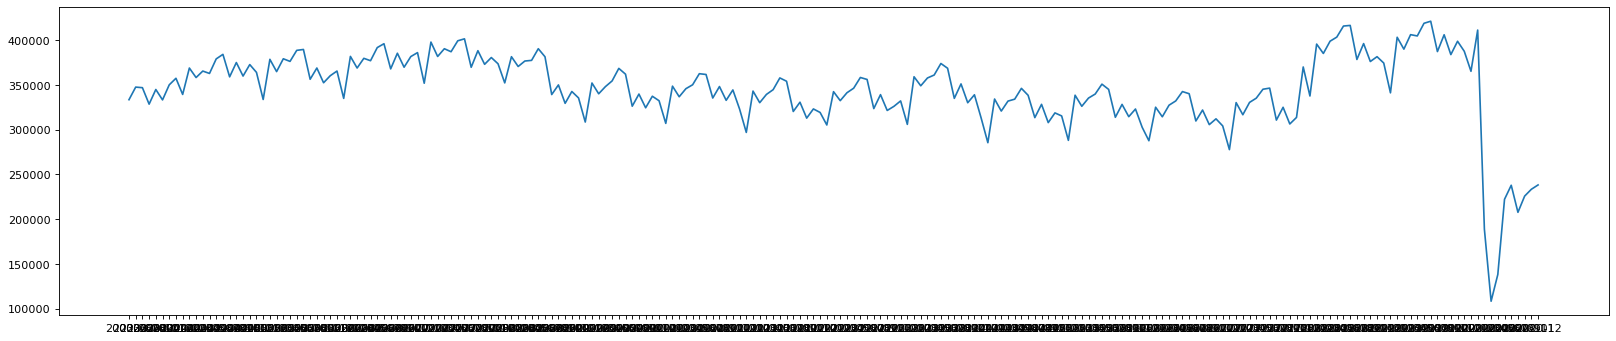

In [29]:
plt.figure(figsize=(25, 5), dpi=80)
plt.plot(df.groupby('year_month').arr_flights.agg(sum))
plt.show();

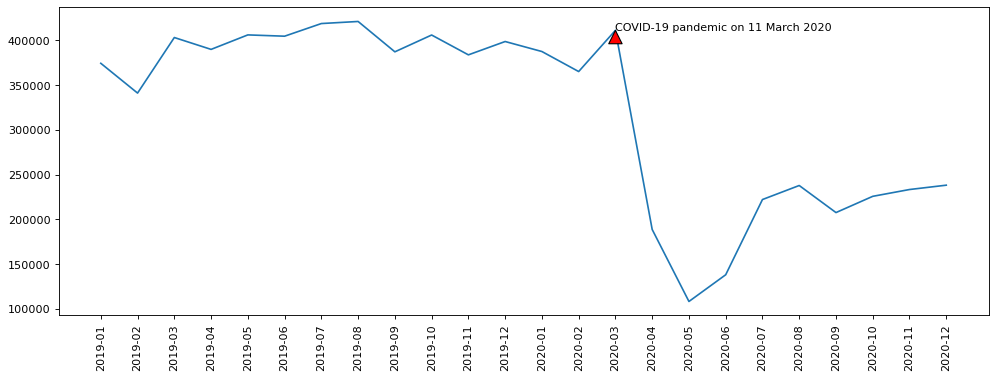

In [30]:
plt.figure(figsize=(15, 5), dpi=80)
arr_trend_1920=df[np.logical_or(df['year']==2019,df['year']==2020)].groupby('year_month').arr_flights.agg(sum)
plt.plot(arr_trend_1920)
plt.xticks(arr_trend_1920.index,rotation=90)
plt.annotate('COVID-19 pandemic on 11 March 2020', xy=(14,411181), xytext=(14,411181),
            arrowprops=dict(facecolor='red', shrink=0.05))
plt.show();

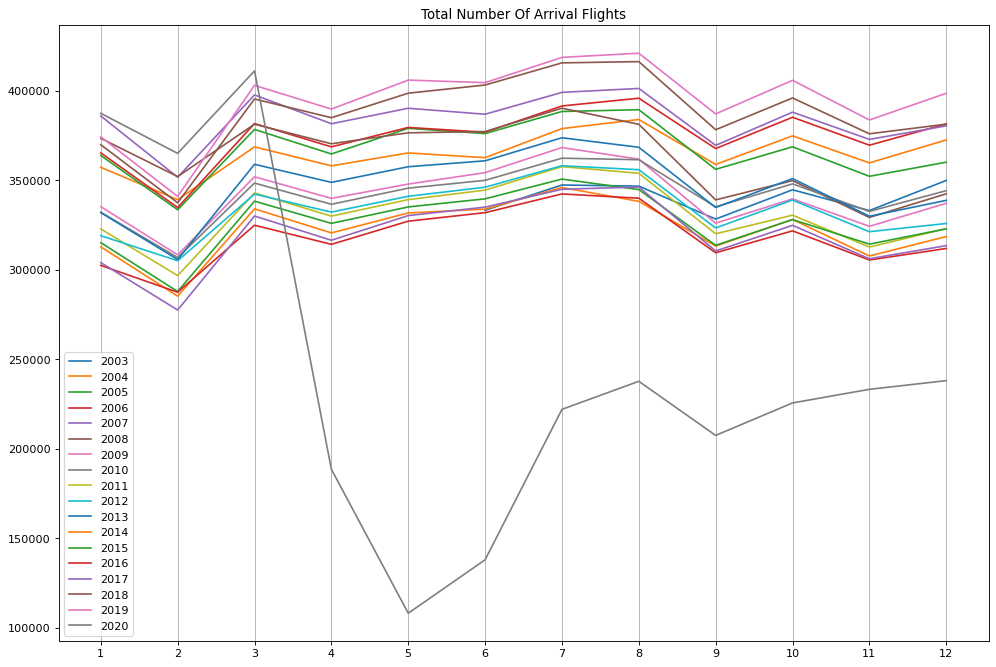

In [31]:
plt.figure(figsize=(15, 10), dpi=80)
years=np.sort(df.year.unique())
for i in range(len(years)):
    yma=df[df['year']==years[i]].groupby('month').arr_flights.agg(sum)
    plt.plot(yma,label=years[i])
plt.legend()
plt.grid(axis='x')
plt.title('Total Number Of Arrival Flights')
plt.xticks(range(1,13))
plt.show();

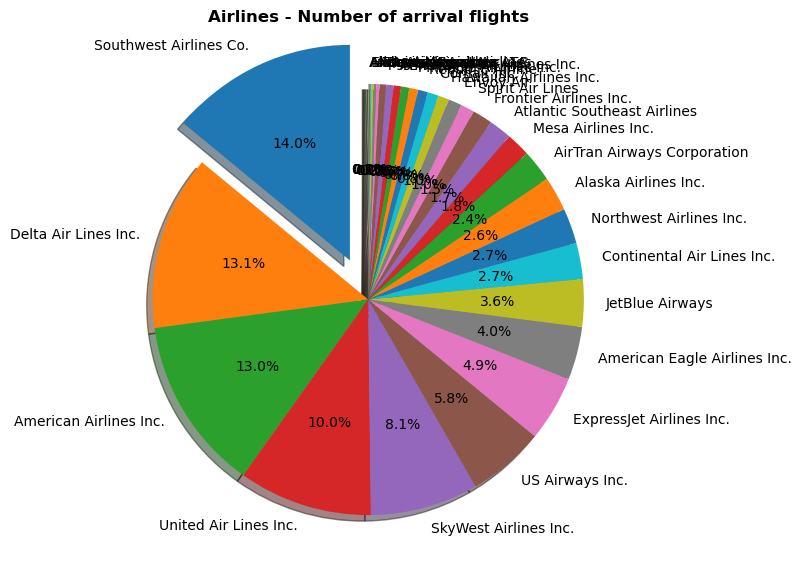

In [32]:
df_carrier=df.groupby('carrier_name').agg(sum).arr_flights.sort_values(ascending=False)
plt.figure(figsize=(7,7))
explode=np.zeros(df_carrier.shape[0])
explode[0]=0.2
plt.pie(df_carrier,labels=df_carrier.index,autopct='%1.1f%%',shadow=True, startangle=90,explode=explode)
plt.title('Airlines - Number of arrival flights',weight='bold')
plt.show();

In [33]:
df_del_arr_car=df.groupby('carrier_name').agg(sum).loc[:,['arr_flights','arr_del15']].sort_values('arr_flights',ascending=False)
df_del_arr_car['del_arr_ratio']=df_del_arr_car['arr_del15']/df_del_arr_car['arr_flights']
df_del_arr_car

,arr_flights,arr_del15,del_arr_ratio
carrier_name,,,
Southwest Airlines Co.,10203667.0,1846050.0,0.180920
Delta Air Lines Inc.,9538065.0,1567986.0,0.164392
American Airlines Inc.,9493991.0,1918099.0,0.202033
United Air Lines Inc.,7302291.0,1433125.0,0.196257
SkyWest Airlines Inc.,5887576.0,1017269.0,0.172782
US Airways Inc.,4201566.0,809629.0,0.192697
ExpressJet Airlines Inc.,3580823.0,780967.0,0.218097
American Eagle Airlines Inc.,2904437.0,605232.0,0.208382
JetBlue Airways,2591801.0,618958.0,0.238814


C:\Users\h.nazari\AppData\Local\Temp\ipykernel_7032\1204442466.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(carriers, rotation = 90)


<Figure size 640x480 with 0 Axes>

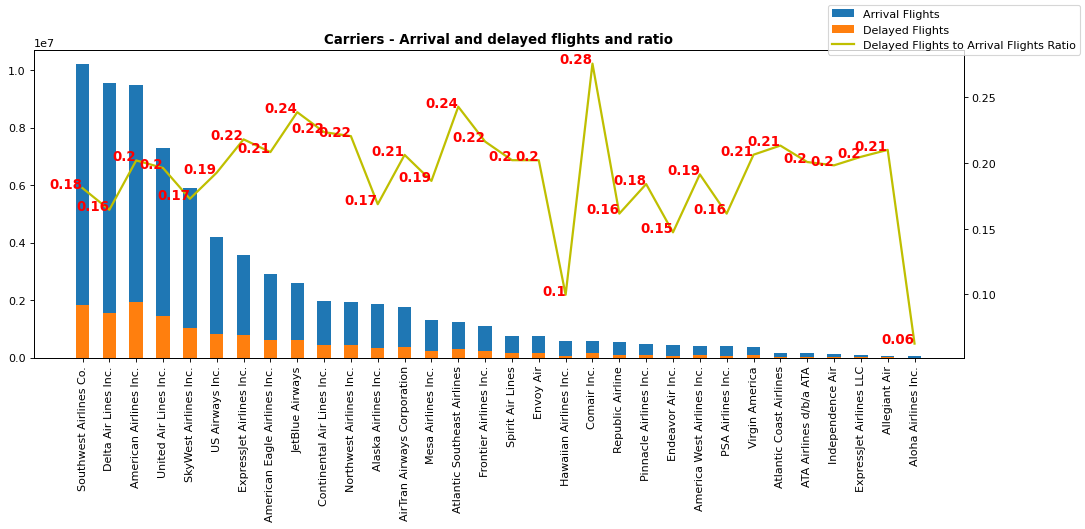

In [34]:
carriers=df_del_arr_car.index
width=0.5


plt.figure()
fig,ax1=plt.subplots(figsize=(15, 5), dpi=80)


ax1.bar(carriers,df_del_arr_car.arr_flights,width=width,label='Arrival Flights')
ax1.bar(carriers,df_del_arr_car.arr_del15,width=width,label='Delayed Flights')
ax1.set_xticklabels(carriers, rotation = 90)

ax2=ax1.twinx()

ax2.plot(df_del_arr_car.del_arr_ratio, c='y', label="Delayed Flights to Arrival Flights Ratio",linewidth=2)

for i in range(len(carriers)):
    ax2.text(carriers[i],df_del_arr_car.del_arr_ratio.iloc[i],round(df_del_arr_car.del_arr_ratio.iloc[i],2),ha='right',c='r',size='large',weight='bold')    

fig.legend()
plt.title('Carriers - Arrival and delayed flights and ratio',weight='bold')
plt.show();

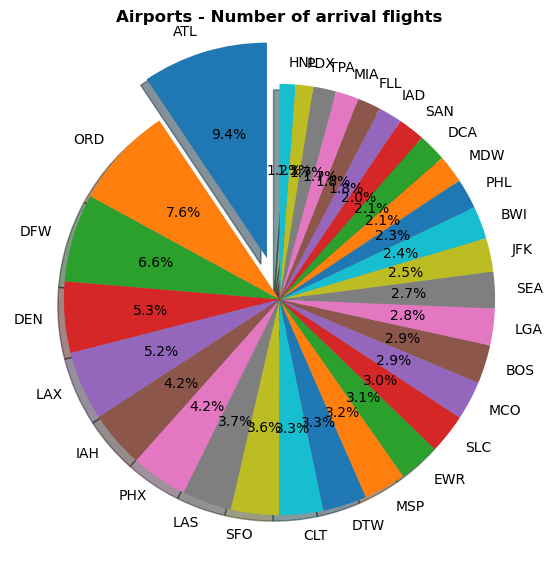

In [35]:
df_airport=df.groupby('airport').agg(sum).arr_flights.sort_values(ascending=False)
plt.figure(figsize=(7,7))
explode=np.zeros(df_airport.shape[0])
explode[0]=0.2
plt.pie(df_airport,labels=df_airport.index,autopct='%1.1f%%',shadow=True,startangle=90,explode=explode)
plt.title('Airports - Number of arrival flights',weight='bold')
plt.show();

In [36]:
df_del_arr_air=df.groupby('airport').agg(sum).loc[:,['arr_flights','arr_del15']].sort_values('arr_flights',ascending=False)
df_del_arr_air['del_arr_ratio']=df_del_arr_air['arr_del15']/df_del_arr_air['arr_flights']
df_del_arr_air

,arr_flights,arr_del15,del_arr_ratio
airport,,,
ATL,6852222.0,1284110.0,0.187401
ORD,5563360.0,1231622.0,0.221381
DFW,4806119.0,862874.0,0.179537
DEN,3891613.0,680172.0,0.174779
LAX,3762144.0,724205.0,0.192498
IAH,3091354.0,544558.0,0.176155
PHX,3087998.0,501658.0,0.162454
LAS,2702222.0,502598.0,0.185994
SFO,2617005.0,654778.0,0.250201


<Figure size 640x480 with 0 Axes>

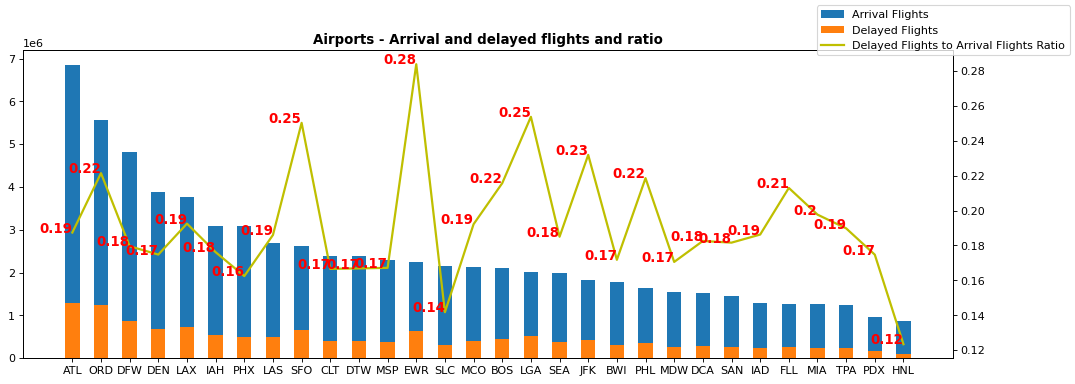

In [37]:
airports=df_del_arr_air.index
width=0.5


plt.figure()
fig,ax1=plt.subplots(figsize=(15, 5), dpi=80)


ax1.bar(airports,df_del_arr_air.arr_flights,width=width,label='Arrival Flights')
ax1.bar(airports,df_del_arr_air.arr_del15,width=width,label='Delayed Flights')

ax2=ax1.twinx()

ax2.plot(df_del_arr_air.del_arr_ratio, c='y', label="Delayed Flights to Arrival Flights Ratio",linewidth=2)

for i in range(len(airports)):
    ax2.text(airports[i],df_del_arr_air.del_arr_ratio.iloc[i],round(df_del_arr_air.del_arr_ratio.iloc[i],2),ha='right',c='r',size='large',weight='bold')    

fig.legend()
plt.title('Airports - Arrival and delayed flights and ratio',weight='bold')
plt.show();

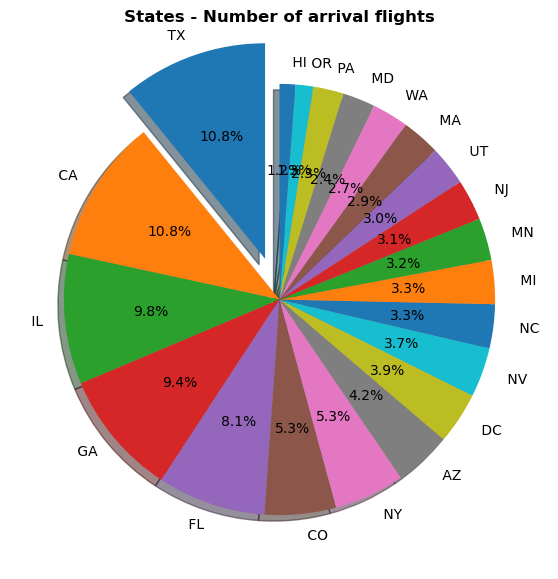

In [38]:
df_state=df.groupby('state').agg(sum).arr_flights.sort_values(ascending=False)
plt.figure(figsize=(7,7))
explode=np.zeros(df_state.shape[0])
explode[0]=0.2
plt.pie(df_state,labels=df_state.index,autopct='%1.1f%%',shadow=True,startangle=90,explode=explode)
plt.title('States - Number of arrival flights',weight='bold')
plt.show();

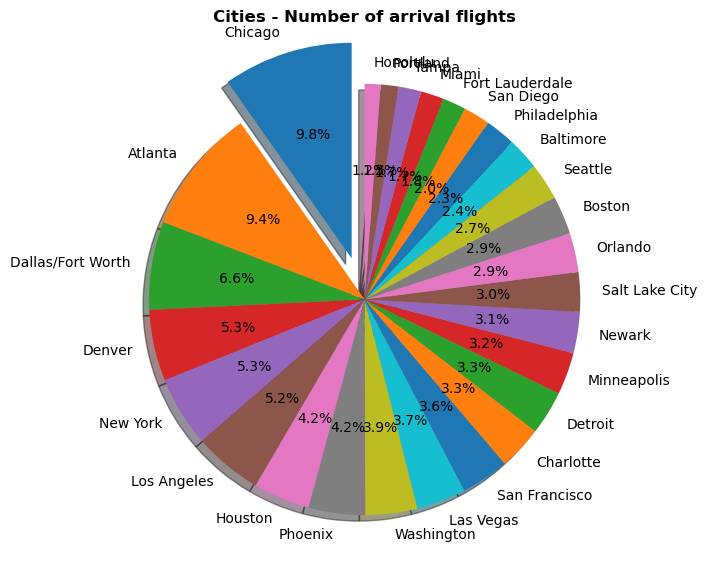

In [39]:
df_city=df.groupby('city').agg(sum).arr_flights.sort_values(ascending=False)
plt.figure(figsize=(7,7))
explode=np.zeros(df_city.shape[0])
explode[0]=0.2
plt.pie(df_city,labels=df_city.index,autopct='%1.1f%%',shadow=True,startangle=90,explode=explode)
plt.title('Cities - Number of arrival flights',weight='bold')
plt.show();

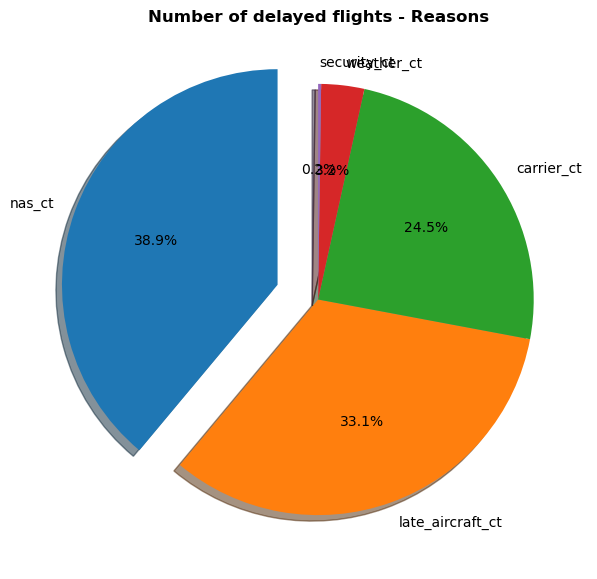

In [40]:
del_n_total=np.sum(df[['carrier_ct','weather_ct','nas_ct','security_ct','late_aircraft_ct']])
del_n_total=del_n_total.sort_values(ascending=False)
plt.figure(figsize=(7,7))
explode=np.zeros(del_n_total.shape[0])
explode[0]=0.2
plt.pie(del_n_total,labels=del_n_total.index,autopct='%1.1f%%',shadow=True,startangle=90,explode=explode)
plt.title('Number of delayed flights - Reasons',weight='bold')
plt.show();

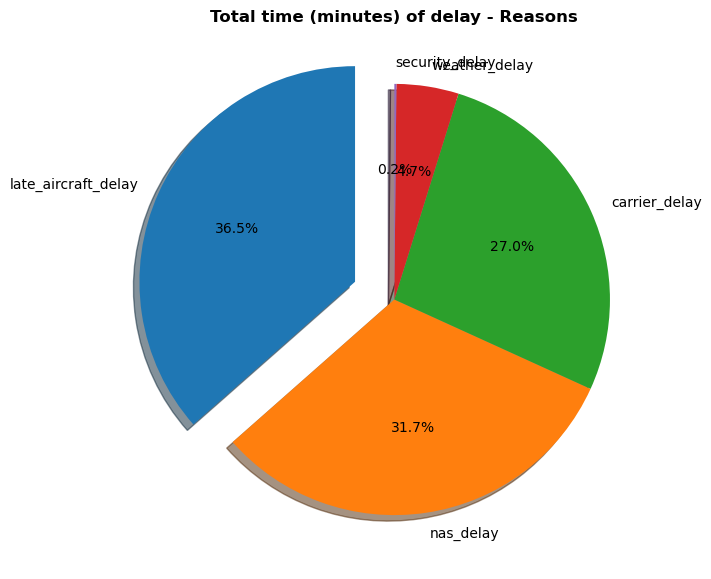

In [41]:
del_min_total=np.sum(df[['carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay']])
del_min_total=del_min_total.sort_values(ascending=False)
plt.figure(figsize=(7,7))
explode=np.zeros(del_min_total.shape[0])
explode[0]=0.2
plt.pie(del_min_total,labels=del_min_total.index,autopct='%1.1f%%',shadow=True,startangle=90,explode=explode)
plt.title('Total time (minutes) of delay - Reasons',weight='bold')
plt.show();

In [42]:
df.city.unique().size

27

In [43]:
df.airport.unique().size

30

In [44]:
df.state.unique().size

21

In [45]:
df.carrier.unique().size

28

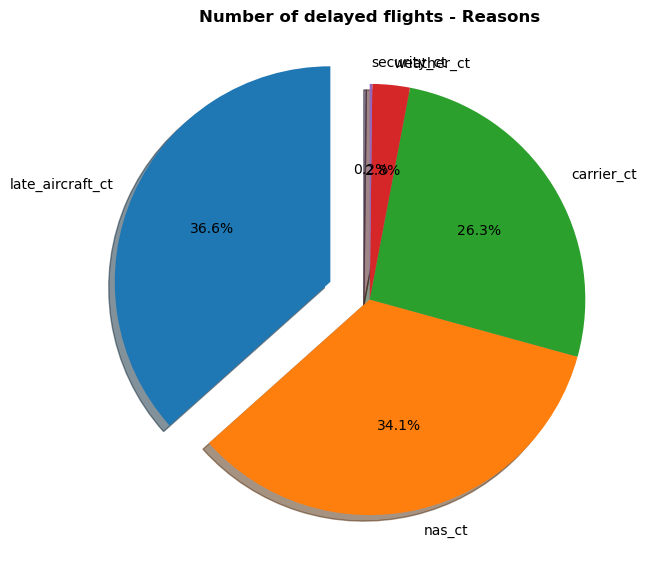

In [46]:
year=2012
del_n_total=np.sum(df[df['year']==year].loc[:,['carrier_ct','weather_ct','nas_ct','security_ct','late_aircraft_ct']])
del_n_total=del_n_total.sort_values(ascending=False)
plt.figure(figsize=(7,7))
explode=np.zeros(del_n_total.shape[0])
explode[0]=0.2
plt.pie(del_n_total,labels=del_n_total.index,autopct='%1.1f%%',shadow=True,startangle=90,explode=explode)
plt.title('Number of delayed flights - Reasons',weight='bold')
plt.show();

In [133]:
import folium

usa_map =  folium.Map(location=[39.7620, -104.8758], zoom_start=4) 
usa_map.save('usa_map.html')

In [134]:
usa_map

In [55]:
df['city_state']=df['city']+"-"+df['state']

In [103]:
df_city=df.groupby('city_state').agg(sum).loc[:,['arr_flights','arr_del15']]

In [54]:
usa_latlong=pd.read_csv('uscities.csv')

In [56]:
usa_latlong['city_state']=usa_latlong['city']+"- "+usa_latlong['state_id']

In [105]:
df_city_lat=pd.DataFrame(np.zeros(27),index=df_city.index,columns=['lat'])
df_city_long=pd.DataFrame(np.zeros(27),index=df_city.index,columns=['long'])

In [106]:
for city in df.city_state.unique():
    df_city_lat.loc[city,'lat']=usa_latlong[usa_latlong['city_state']==city].loc[:,'lat'].iloc[0]
    df_city_long.loc[city,'long']=usa_latlong[usa_latlong['city_state']==city].loc[:,'lng'].iloc[0]

In [107]:
df_city=pd.concat([df_city,df_city_lat,df_city_long],axis=1)

In [135]:
for i in range(df_city.shape[0]):
 folium.CircleMarker([df_city.iloc[i,2],df_city.iloc[i,3]],radius=df_city.iloc[i,0]*20/max(df_city.iloc[:,0]),color='yellow',fill_color='green',fill_opacity=0.3).add_to(usa_map) 
usa_map

In [122]:
from folium.plugins import HeatMap

usa_heatmap =  folium.Map(location=[39.7620, -104.8758], zoom_start=4) 
usa_heatmap.save('usa_heatmap.html')

heatmap_data=np.array(df_city.loc[:,['lat','long','arr_flights']])
HeatMap(data=heatmap_data).add_to(usa_heatmap)
usa_heatmap

In [136]:
for i in range(df_city.shape[0]):
 folium.CircleMarker([df_city.iloc[i,2],df_city.iloc[i,3]+0.7],radius=df_city.iloc[i,1]*20/max(df_city.iloc[:,1]),color='red',fill_color='red',fill_opacity=0.3).add_to(usa_map) 
usa_map

In [137]:
from folium.plugins import HeatMap

usa_heatmap_del =  folium.Map(location=[39.7620, -104.8758], zoom_start=4) 
usa_heatmap_del.save('usa_heatmap.html')

heatmap_data_del=np.array(df_city.loc[:,['lat','long','arr_del15']])
HeatMap(data=heatmap_data_del).add_to(usa_heatmap_del)
usa_heatmap_del

In [175]:
df_city1=df.groupby('city_state').agg(sum).loc[:,['arr_flights','arr_del15','arr_delay']]

In [176]:
df_city1['del_avg_dur']=df_city1['arr_delay']/df_city1['arr_del15']

In [177]:
df_city1=df_city1.sort_values('del_avg_dur',ascending=False)

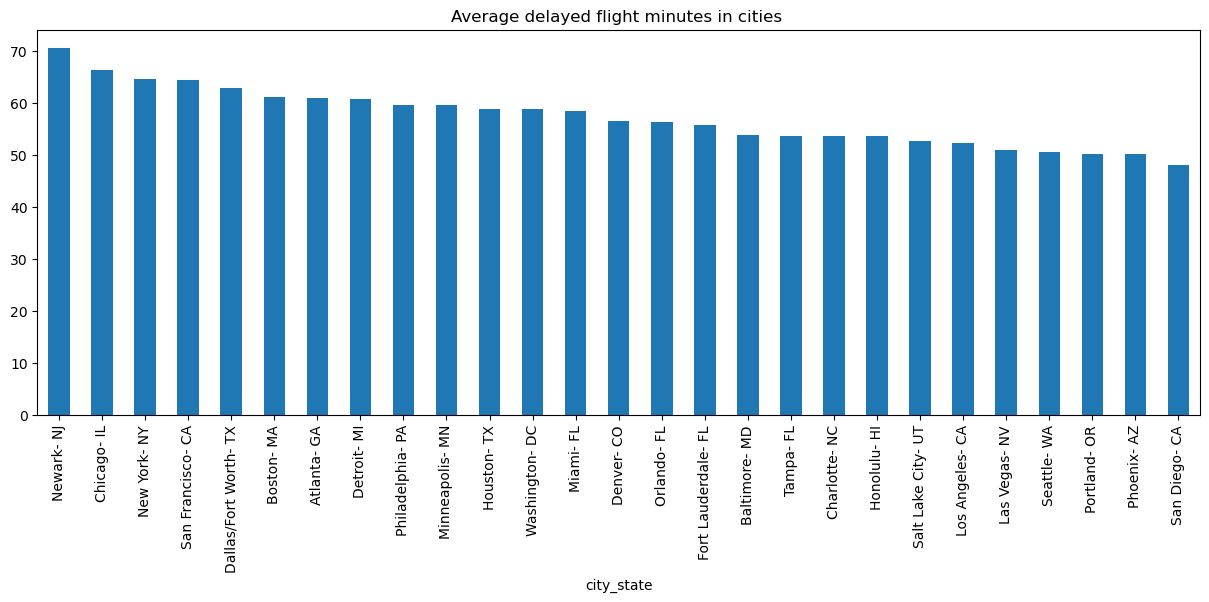

In [178]:
plt.figure(figsize=(15,5))
df_city1.loc[:,'del_avg_dur'].plot(kind='bar')
plt.title('Average delayed flight minutes in cities ')
plt.show();

In [180]:
df['del_avg_dur']=df['arr_delay']/df['arr_del15']

In [263]:
np.sum(df.del_avg_dur.isna())

928

In [268]:
df.fillna(0,inplace=True)

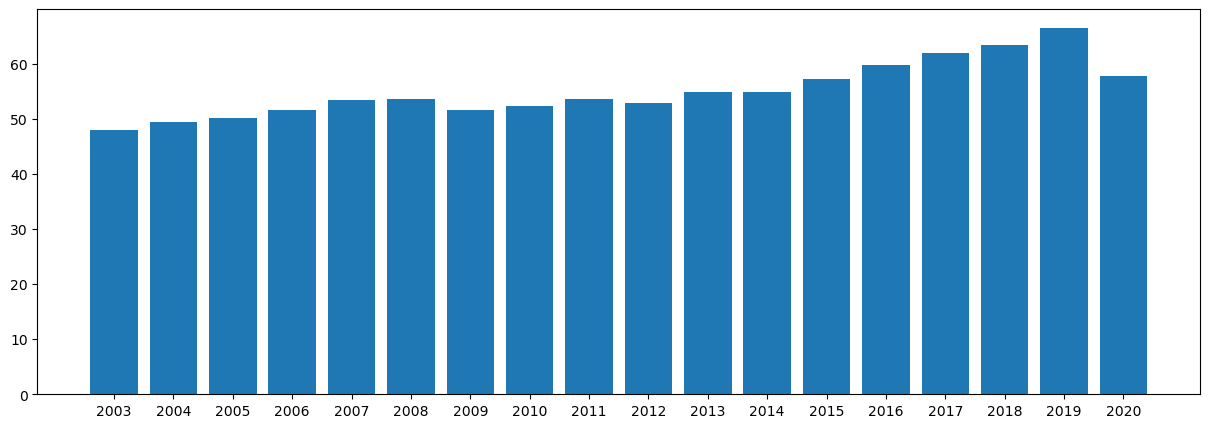

In [203]:
df_avg_del=df.groupby('year').agg('mean').del_avg_dur
plt.figure(figsize=(15,5))
plt.bar(df_avg_del.index,df_avg_del)
plt.xticks(df_avg_del.index)
plt.show();

In [207]:
df['del_avg_dur'].describe()

count    72283.000000
mean        54.981059
std         19.609340
min         15.000000
25%         43.791607
50%         52.834532
75%         63.245029
max       1399.000000
Name: del_avg_dur, dtype: float64

In [239]:
df.iloc[np.argmax(df['del_avg_dur']),:]

year                                                        2017
month                                                         10
year_month                                               2017-10
carrier                                                       EV
carrier_name                            ExpressJet Airlines Inc.
airport                                                      MDW
airport_name           Chicago, IL: Chicago Midway International
state                                                         IL
city                                                     Chicago
arr_flights                                                  5.0
arr_del15                                                    1.0
carrier_ct                                                   1.0
weather_ct                                                   0.0
nas_ct                                                       0.0
security_ct                                                  0.0
late_aircraft_ct         

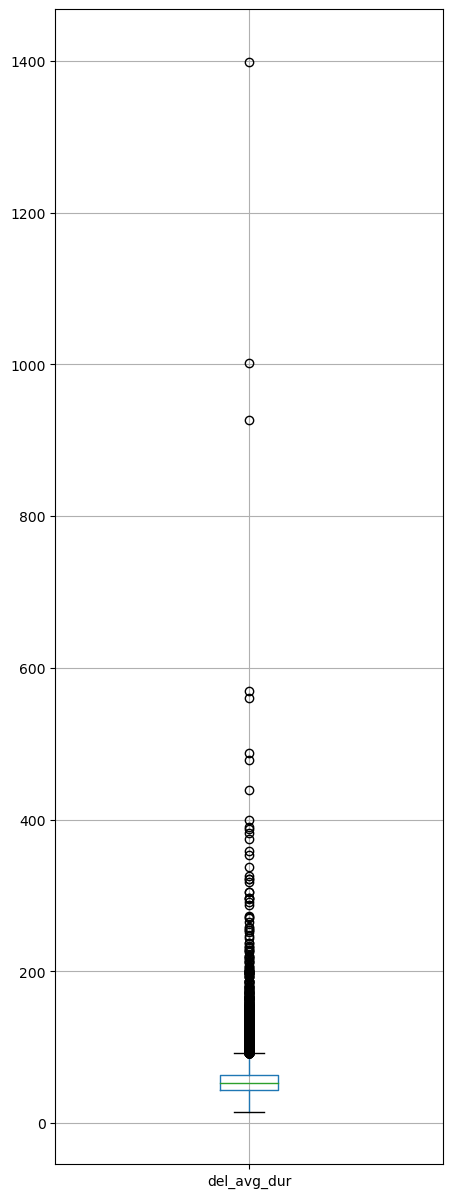

In [226]:
plt.figure(figsize=(5,15))
df.boxplot(column=['del_avg_dur'])
plt.show();

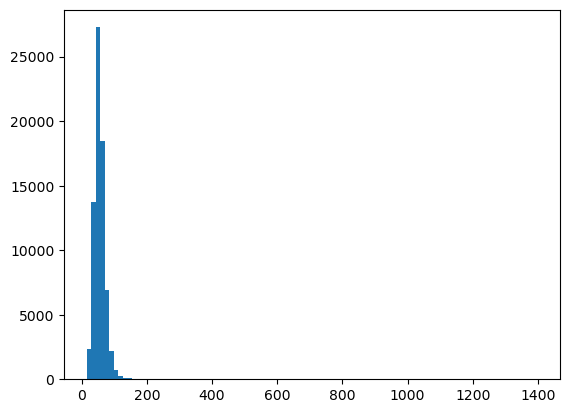

In [214]:
plt.hist(df['del_avg_dur'],bins=100);

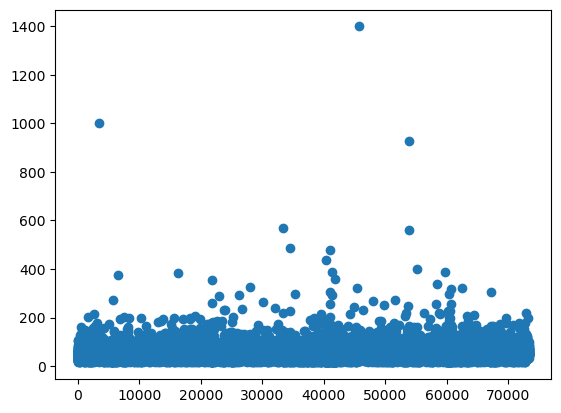

In [213]:
plt.scatter(x=df.index,y=df['del_avg_dur'])

C:\Users\h.nazari\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='del_avg_dur'>

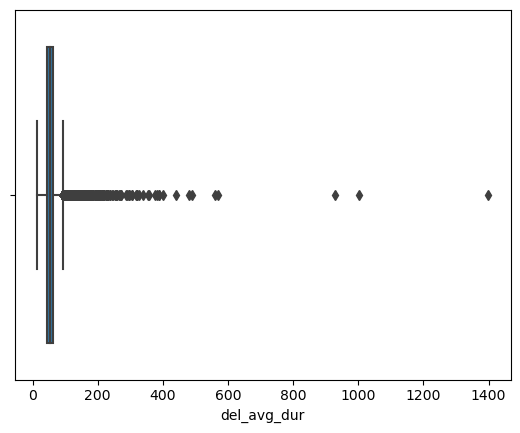

In [240]:
import seaborn as sns
sns.boxplot(df['del_avg_dur'])

In [241]:
#Dealing with outliers

In [242]:
#1st method
from scipy import stats

In [272]:

out_low=df[stats.zscore(df['del_avg_dur'])<-3]
out_high=df[stats.zscore(df['del_avg_dur'])>3]


In [273]:
out_low.shape

(0, 29)

In [274]:
out_high.shape

(526, 29)

In [306]:
df_wout=df.drop(out_high.index,axis=0)

In [307]:
df_wout.shape

(72685, 29)

In [308]:
df.shape

(73211, 29)

<AxesSubplot:>

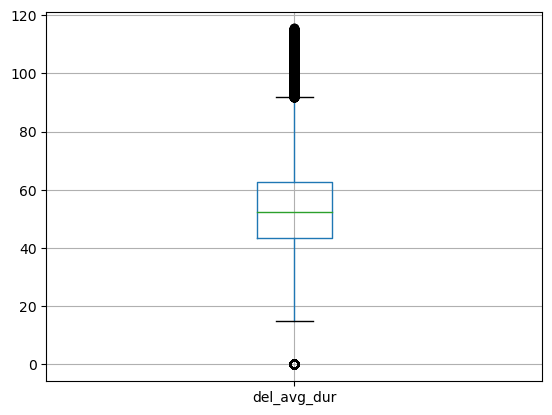

In [309]:
df_wout.boxplot(column=['del_avg_dur'])

C:\Users\h.nazari\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='del_avg_dur'>

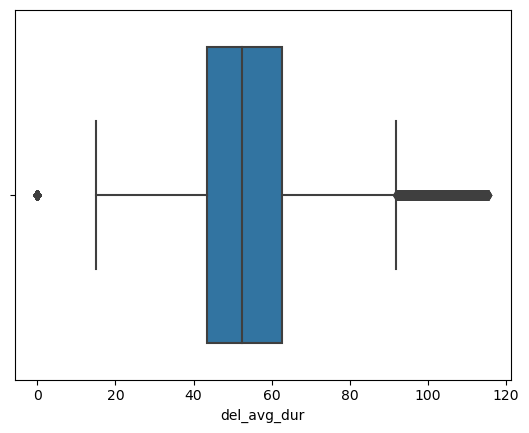

In [310]:
sns.boxplot(df_wout['del_avg_dur'])

(array([  928.,   879.,  4761., 17078., 22878., 15314.,  6777.,  2570.,
         1075.,   425.]),
 array([  0.  ,  11.55,  23.1 ,  34.65,  46.2 ,  57.75,  69.3 ,  80.85,
         92.4 , 103.95, 115.5 ]),
 <BarContainer object of 10 artists>)

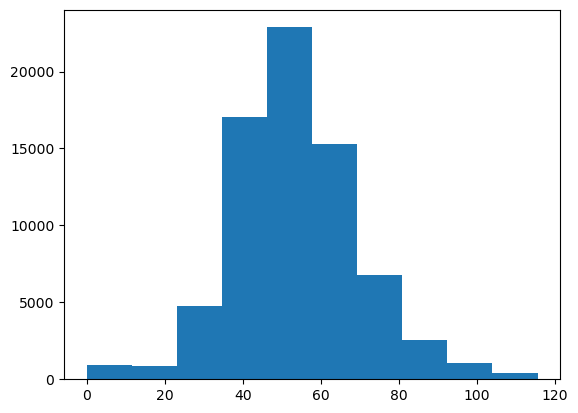

In [311]:
plt.hist(df_wout['del_avg_dur'])

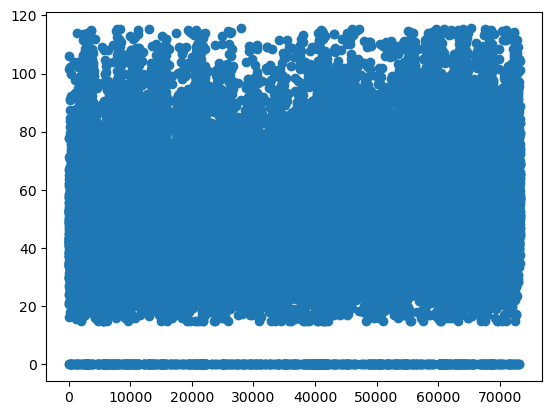

In [312]:
plt.scatter(x=df_wout.index,y=df_wout['del_avg_dur'])

Class delayed based on duration 
* very short = delay less than or equal to 23 min
* short      = delay between 24 and 46
* medium     = delay between 46.1 and 69
* long       = delay between 69.1 and 92
* very long  = delay greater than 92.1

In [402]:
df_wout['del_class']=df_wout['del_avg_dur'].agg(lambda x: 'very short' if x<=23 else('short' if x<=46 else('medium' if x<=69 else ('long' if x<=92 else 'very long'))))

In [406]:
df_wout.del_class.value_counts()

medium        38309
short         21456
long           9568
very short     1805
very long      1547
Name: del_class, dtype: int64

In [442]:
data=df_wout.loc[:,['year', 'month','carrier','airport','state', 'city','del_class']]

In [443]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [444]:
le.fit(data['carrier'])
data['l_carrier']=le.transform(data['carrier'])

In [445]:
le.fit(data['airport'])
data['l_airport']=le.transform(data['airport'])

In [446]:
le.fit(data['state'])
data['l_state']=le.transform(data['state'])

In [447]:
le.fit(data['city'])
data['l_city']=le.transform(data['city'])

In [448]:
le.fit(data['del_class'])
data['l_del_class']=le.transform(data['del_class'])

In [486]:
X=data.loc[:,['year', 'month','l_carrier', 'l_airport', 'l_city']]
y=data.loc[:,'l_del_class']

In [487]:
'''
from sklearn.preprocessing import StandardScaler
standardize=StandardScaler()
standardize.fit(X)
X=standardize.fit_transform(X)
'''

SyntaxError: EOF while scanning triple-quoted string literal (1922839227.py, line 4)

In [488]:
from sklearn.model_selection import train_test_split

In [489]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)

In [490]:
from sklearn.linear_model import LogisticRegression

In [491]:
lr=LogisticRegression(penalty='none',solver='newton-cg')
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.5283695334973111

In [492]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [493]:
knn=KNeighborsClassifier(n_neighbors=13,metric='minkowski',p=2)

In [494]:
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

C:\Users\h.nazari\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.5687247258931921

In [495]:
df_wout.columns

Index(['year', 'month', 'year_month', 'carrier', 'carrier_name', 'airport',
       'airport_name', 'state', 'city', 'arr_flights', 'arr_del15',
       'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
       'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'del_arr_ratio', 'cancelled_arr_ratio', 'diverted_arr_ratio',
       'city_state', 'del_avg_dur', 'del_class'],
      dtype='object')

# Time Series

In [680]:
dfwout_yearmonth=df_wout.groupby('year_month').agg(sum).loc[:,'arr_flights']

In [681]:
dfwout_yearmonth_2003_2019=dfwout_yearmonth.iloc[:-12]

In [682]:
dfwout_yearmonth_2003_2019.index=range(199)

In [804]:
from statsmodels.tsa.ar_model import AutoReg, ARResults
from statsmodels.tsa import stattools
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

In [730]:
fitar=AutoReg(np.array(dfwout_yearmonth_2003_2019),lags=50)
#fitar=AutoReg(np.array(dfwout_yearmonth_2003_2019),lags=1,seasonal=True, period=12)

fittedar=fitar.fit()

In [731]:
fittedar.params

array([ 3.58092827e+04,  6.67285680e-01,  2.99507872e-01,  2.23633769e-02,
       -3.75675693e-02,  1.39670968e-01, -1.12691438e-01,  4.24961382e-02,
        1.20757831e-01, -3.88652982e-01,  4.96224402e-02,  1.31308515e-01,
        1.42352584e-01, -2.01190554e-01,  1.86079229e-01,  1.27384076e-03,
        1.31876504e-02, -1.84144805e-01, -6.80352171e-02,  1.51390295e-01,
       -2.43991490e-03,  3.27204171e-02, -2.10565442e-01,  1.45419625e-01,
        1.06417759e-01, -2.54949665e-02, -5.70787267e-02, -1.51572252e-01,
       -4.35265554e-02,  2.12639577e-01,  1.07476373e-01, -1.78269135e-01,
       -1.43507012e-01,  1.30340081e-01,  1.48743730e-02,  2.10056260e-01,
        3.66601635e-01, -3.17007402e-01, -3.89287757e-01,  1.42627319e-01,
       -1.55445059e-02, -2.42915928e-01,  6.54900316e-02,  6.95465800e-03,
        1.17886352e-01,  2.29919804e-01,  1.12163640e-01, -5.46389129e-01,
        3.63747460e-01, -1.73813094e-01,  5.39033821e-02])

In [732]:
acorr_ljungbox(fittedar.resid)

,lb_stat,lb_pvalue
1,0.009223,0.923493
2,0.023610,0.988264
3,0.049010,0.997156
4,0.049480,0.999699
5,0.794878,0.977359
6,0.909580,0.988809
7,2.258403,0.944166
8,2.289709,0.970817
9,2.948678,0.966295
10,3.033073,0.980635


<Figure size 640x480 with 0 Axes>

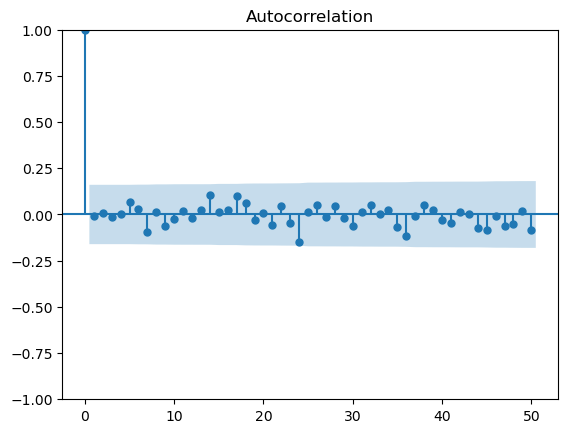

In [733]:
acorr_ljungbox(fittedar.resid)
plt.figure()
plot_acf(fittedar.resid,lags=50)
plt.show();


In [734]:
fittedar.predict(start=199,end=211)

array([381348.53789042, 364243.11771574, 411126.32626282, 373717.46915783,
       389145.73310566, 405013.03238952, 427993.95515328, 411823.38277498,
       374801.74184563, 381564.96596895, 358223.82200335, 378165.14099477,
       391440.43214003])

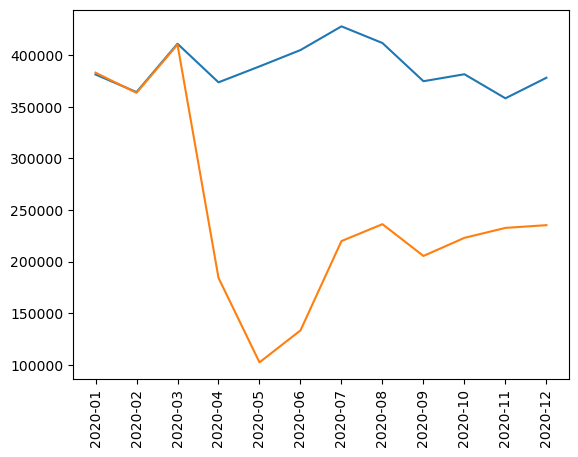

In [735]:
plt.figure()
plt.plot(fittedar.predict(start=199,end=210))
plt.plot(dfwout_yearmonth.iloc[-12:])
plt.xticks(dfwout_yearmonth.iloc[-12:].index,rotation=90);

In [800]:
#predict 2019

In [690]:
dfwout_yearmonth_2003_2018=dfwout_yearmonth.iloc[:-24]

In [691]:
dfwout_yearmonth_2003_2018.index=range(187)

In [794]:
#fitar=AutoReg(np.array(dfwout_yearmonth_2003_2018),lags=50)
fitar=AutoReg(np.array(dfwout_yearmonth_2003_2018),lags=50,seasonal=True, period=12)

fittedar=fitar.fit()

In [795]:
fittedar.params

array([-8.84510479e+03,  5.11389035e+04,  3.98723869e+04, -1.55115150e+04,
        6.83981007e+04, -1.47060242e+04,  7.83303464e+04,  3.10431959e+04,
       -7.50243480e+03,  8.10204012e+04,  1.85671213e+04,  8.13642058e+04,
        6.62123687e-01,  4.10576494e-01,  3.46834285e-02, -1.06576802e-01,
       -4.47529327e-02,  9.96651069e-02, -5.45666146e-02,  1.57982249e-01,
       -3.78941607e-01,  6.84398882e-02,  1.74071118e-01, -7.03269398e-02,
        4.82019856e-02, -5.30484523e-02,  1.30315152e-01,  2.85775272e-02,
       -1.49176802e-01, -1.07804683e-01, -5.62210559e-02,  2.93975714e-01,
       -9.07106044e-02, -2.66132281e-01,  2.58436467e-01, -2.08161146e-01,
        1.83939248e-01, -6.36051278e-02,  9.94080749e-02, -3.82554625e-02,
        1.34350735e-02,  9.21706724e-03, -6.90325225e-02,  1.02072996e-01,
       -1.51619310e-01,  3.22784925e-02,  2.42780609e-01,  2.50279354e-02,
       -1.01783609e-01, -1.45234311e-01,  2.47734551e-01, -2.93567376e-01,
       -3.18360090e-01,  

In [796]:
acorr_ljungbox(fittedar.resid)

,lb_stat,lb_pvalue
1,0.001415,0.969996
2,0.203164,0.903407
3,0.252402,0.968717
4,0.506279,0.972887
5,0.559335,0.989789
6,0.576662,0.996777
7,0.715265,0.998216
8,0.794558,0.999243
9,0.822011,0.999750
10,0.882656,0.999903


<Figure size 640x480 with 0 Axes>

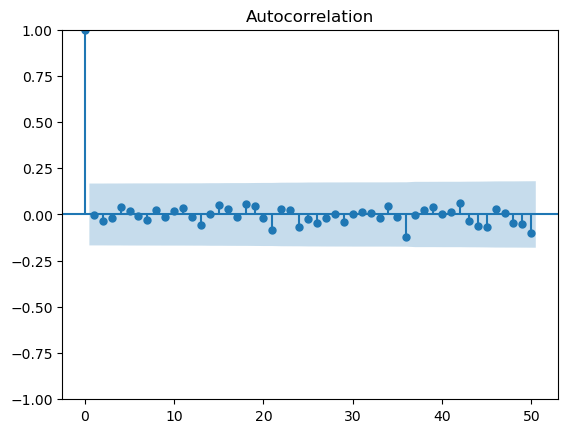

In [797]:
acorr_ljungbox(fittedar.resid)
plt.figure()
plot_acf(fittedar.resid,lags=50)
plt.show();


In [798]:
fittedar.predict(start=187,end=198)

array([376161.36805266, 362847.27296707, 388438.54708348, 390965.48221043,
       405210.22999741, 409166.40740042, 409093.82211314, 402468.75974919,
       380421.27724536, 390450.38223709, 346962.97659918, 381933.80488645])

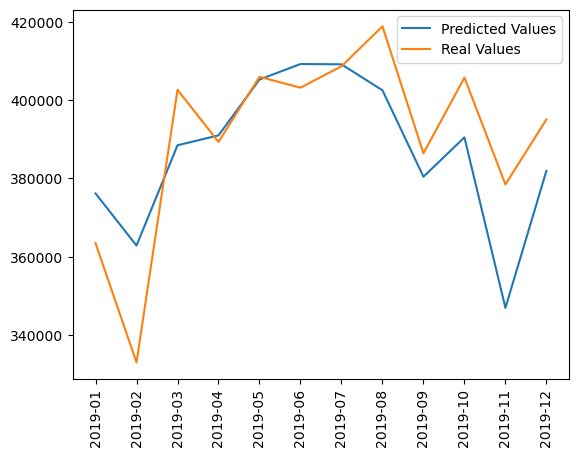

In [865]:
plt.figure()
plt.plot(predar,label="Predicted Values")
plt.plot(dfwout_yearmonth.iloc[187:199],label='Real Values')
plt.xticks(dfwout_yearmonth.iloc[187:199].index,rotation=90)
plt.legend();

In [870]:
#Model validation
i=0
test_size=12

X= np.array(dfwout_yearmonth_2003_2018)
predar=np.empty(test_size)


for i in range(test_size):
    print(i) 
    fitar=AutoReg(X[:(187+i)],lags=50,seasonal=True, period=12)
    fittedar=fitar.fit()
    j=187+i
    v=fittedar.predict(start=j,end=j)
    predar[i]=v

0
1
2
3
4
5
6
7
8
9
10
11


In [871]:
predar

array([376161.36805266, 362847.27296707, 388438.54708348, 390965.48221043,
       405210.22999741, 409166.40740042, 409093.82211314, 402468.75974919,
       380421.27724536, 390450.38223709, 346962.97659918, 381933.80488645])

In [872]:
msear=np.mean((predar-dfwout_yearmonth.iloc[187:199])**2)
msear

248858918.9558929

In [873]:
R2ar=1-np.sqrt(msear)/np.std(dfwout_yearmonth.iloc[187:199])
R2ar

0.30109532687554097

C:\Users\h.nazari\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\h.nazari\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\h.nazari\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Figure size 640x480 with 0 Axes>

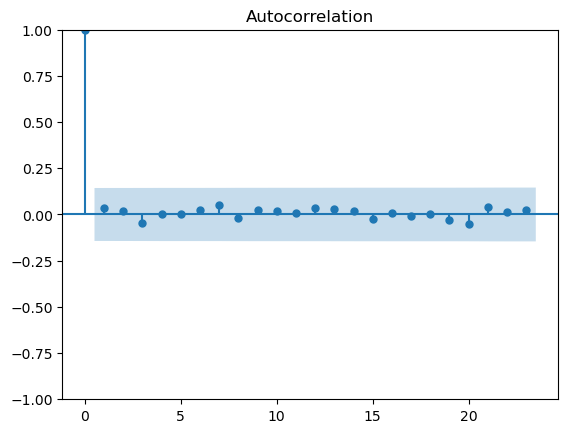

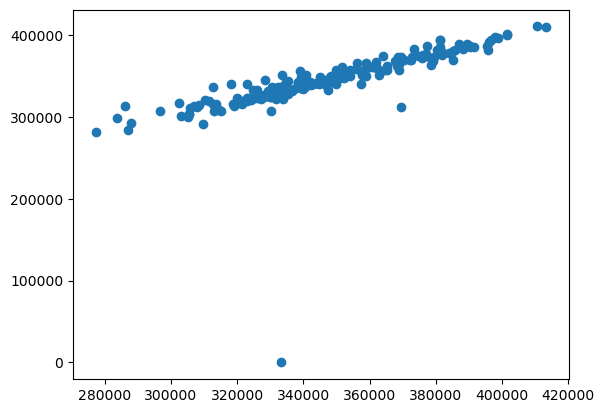

In [838]:
#ARMA Models
fitarma=ARIMA(np.array(dfwout_yearmonth_2003_2018), order=(15,0,15), trend="n")
fittedarma=fitarma.fit()
#fittedarma=fitarma.fit()
plt.figure()
plot_acf(fittedarma.resid)
plt.figure()
plt.scatter(np.array(dfwout_yearmonth_2003_2018),fittedarma.fittedvalues,marker='o')


In [839]:
acorr_ljungbox(fittedarma.resid)

,lb_stat,lb_pvalue
1,0.270089,0.603272
2,0.331511,0.847253
3,0.717809,0.869007
4,0.722674,0.948504
5,0.725728,0.981527
6,0.835463,0.991089
7,1.311873,0.988119
8,1.390516,0.994380
9,1.520073,0.996995
10,1.579103,0.998667


In [840]:
fittedarma.predict(start=187,end=198)

array([397067.3830626 , 365506.95163796, 416070.5596235 , 395334.3200992 ,
       403480.10897274, 406985.54851333, 409803.88748479, 407584.75505672,
       385800.43509014, 396555.33942855, 377382.62567558, 382271.68229601])

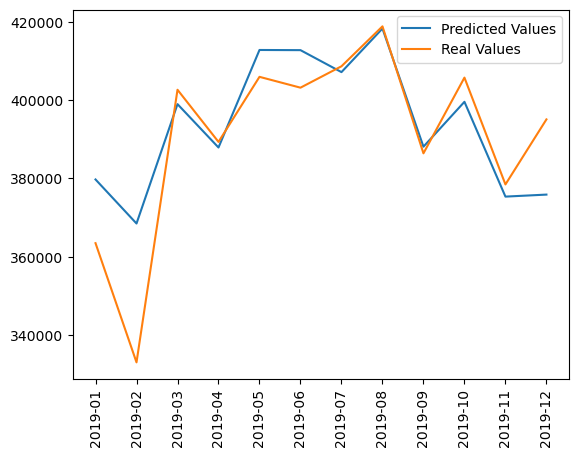

In [909]:
plt.figure()
plt.plot(predarma,label="Predicted Values")
plt.plot(dfwout_yearmonth.iloc[187:199],label='Real Values')
plt.xticks(dfwout_yearmonth.iloc[187:199].index,rotation=90)
plt.legend();

In [907]:
msearma=np.mean((predarma-dfwout_yearmonth.iloc[187:199])**2)
msearma

174491834.92364153

In [908]:
R2arma=1-np.sqrt(msearma)/np.std(dfwout_yearmonth.iloc[187:199])
R2arma

0.41476688278391094

In [906]:
#Model validation
i=0
test_size=12

X= np.array(dfwout_yearmonth_2003_2018)
predarma=np.empty(test_size)


for i in range(test_size):
    print(i) 
    fitarma=ARIMA(X[:(187+i)], order=(5,0,5), trend="n")
    fittedarma=fitarma.fit()
    j=187+i
    v=fittedarma.predict(start=j,end=j)
    predarma[i]=v

0


C:\Users\h.nazari\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1


C:\Users\h.nazari\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2


C:\Users\h.nazari\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


3


C:\Users\h.nazari\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


4


C:\Users\h.nazari\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


5


C:\Users\h.nazari\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6


C:\Users\h.nazari\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7


C:\Users\h.nazari\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


8


C:\Users\h.nazari\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


9


C:\Users\h.nazari\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


10


C:\Users\h.nazari\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


11


C:\Users\h.nazari\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
